# To Do

- Download more datasets
- Show how more data leads to improved metrics

Datasets
- RAVDESS
- SAVEE
- TESS
- CREMAD

Research
- 7 cardinal emotions
- Ed Kang's paper
- EU AI Act restrctions on emotion recogniton wrt OpenAI's Advanced Voice Mode not rolling out into the EU


# Credits / References

- https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition
    - Good for setup, not following neural net approach for now
- https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend
- https://www.kaggle.com/code/ejlok1/audio-emotion-part-1-explore-data

- https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225

---

https://paperswithcode.com/task/speech-emotion-recognition

https://paperswithcode.com/area/speech

# Setup

- Install Kaggle CLI tool

`pip install kaggle`

- Setup Kaggle API keys and kaggle.json

`https://www.kaggle.com/docs/api`

- Download RAVDESS dataset (https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio/data)

- Attribution: "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

`kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio`

You can also do this in code with the `opendatasets` library.

In [1]:
# unzip dataset

import zipfile

def unzip_file(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zf:
        zf.extractall(dest_dir)

unzip_file('datasets/ravdess-emotional-speech-audio.zip', 'datasets/ravdess-emotional-speech-audio')

In [ ]:
# get the file names and total number of files in the dataset
import os
import glob
import pandas as pd

def get_total_files():
    total_files = 0
    for dirpath, dirnames, filenames in os.walk('datasets/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'):
        for file in filenames:
            print(file)
            total_files += 1
    return total_files

total_files = get_total_files()
print(total_files)


In [75]:
"""
let's create a pandas dataframe with this data

Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. 
The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent.
Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions.
Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. 
The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). 
These identifiers define the stimulus characteristics:

Filename identifiers

    [0] - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

    [1] - Vocal channel (01 = speech, 02 = song).

    [2] - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

    [3] - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

    [4] - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

    [5] - Repetition (01 = 1st repetition, 02 = 2nd repetition).

    [6] - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

    Audio-only (03)
    Speech (01)
    Fearful (06)
    Normal intensity (01)
    Statement "dogs" (02)
    1st Repetition (01)
    12th Actor (12) - Female, as the actor ID number is even.
"""

files = []
for dirpath, dirnames, filenames in os.walk('datasets/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'):
    for file in filenames:
        file = file[:-4] # remove .wav extension
        split_filename = file.split('-')
        new_row = {
            'file_path': os.path.join(dirpath, file + '.wav'),
            'modality': split_filename[0], 
            'vocal_channel': split_filename[1], 
            'emotion': split_filename[2], 
            'emotional_intensity': split_filename[3], 
            'statement': split_filename[4], 
            'repetition': split_filename[5], 
            'actor': split_filename[6],
            'gender': 2 if int(split_filename[6]) % 2 == 0 else 1
            }
        files.append(new_row)
ravdess_df = pd.DataFrame(files, columns=['file_path', 'modality', 'vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'gender'])
ravdess_df





file_path modality  \
0     ravdess-emotional-speech-audio/audio_speech_ac...       03   
1     ravdess-emotional-speech-audio/audio_speech_ac...       03   
2     ravdess-emotional-speech-audio/audio_speech_ac...       03   
3     ravdess-emotional-speech-audio/audio_speech_ac...       03   
4     ravdess-emotional-speech-audio/audio_speech_ac...       03   
...                                                 ...      ...   
1435  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1436  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1437  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1438  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1439  ravdess-emotional-speech-audio/audio_speech_ac...       03   

     vocal_channel emotion emotional_intensity statement repetition actor  \
0               01      05                  01        02         01    16   
1               01      06                  01        02         02    16   
2               01      06                  02        01         02    16   
3               01      05                  02        01         01    16   
4               01      07                  01        01         01    16   
...            ...     ...                 ...       ...        ...   ...   
1435            01      03                  02        02         02    08   
1436            01      03                  01        01         02    08   
1437            01      02                  02        01         01    08   
1438            01      02                  01        02         01    08   
1439            01      01                  01        02         02    08   

      gender  
0          2  
1          2  
2          2  
3          2  
4          2  
...      ...  
1435       2  
1436       2  
1437       2  
1438       2  
1439       2  

[1440 rows x 9 columns]

In [52]:
# let's hear some of the audio files
from IPython.display import Audio, display
import random

filename_identifiers = {
    'modality': {
        '01' : 'full-AV', 
        '02' : 'video-only', 
        '03' : 'audio-only'
    },
    'vocal_channel': {
        '01' : 'speech',
        '02' : 'song'
    },
    'emotion': {
        '01' : 'neutral', 
        '02' : 'calm', 
        '03' : 'happy', 
        '04' : 'sad',
        '05' : 'angry',
        '06' : 'fearful',
        '07' : 'disgust',
        '08' : 'surprised'
        },
    'emotional_intensity': {
        '01' : 'normal', 
        '02' : 'strong'
        },
    'statement': {
        '01' : '"Kids are talking by the door"', 
        '02' : '"Dogs are sitting by the door"'
        },
    'repetition': {
        '01' : '1st repetition', 
        '02' : '2nd repetition'
        },
    'gender': {
        1 : 'male', 
        2 : 'female'
        },
}

def play_random_audio():
    random_recording = ravdess_df.sample()
    print(random_recording)
    print('Modality:', filename_identifiers['modality'][random_recording['modality'].values[0]])
    print('Vocal channel:', filename_identifiers['vocal_channel'][random_recording['vocal_channel'].values[0]])
    print('Emotion:', filename_identifiers['emotion'][random_recording['emotion'].values[0]])
    print('Emotional intensity:', filename_identifiers['emotional_intensity'][random_recording['emotional_intensity'].values[0]])
    print('Statement:', filename_identifiers['statement'][random_recording['statement'].values[0]])
    print('Repetition:', filename_identifiers['repetition'][random_recording['repetition'].values[0]])
    print('Actor:', random_recording['actor'].values[0])
    print('Gender:', filename_identifiers['gender'][random_recording['gender'].values[0]])
    
    file_path = random_recording['file_path'].values[0]
    print(file_path)
    display(Audio(file_path))

play_random_audio()

                                             file_path modality vocal_channel  \
874  ravdess-emotional-speech-audio/audio_speech_ac...       03            01   

    emotion emotional_intensity statement repetition actor  gender  
874      02                  01        01         02    23       1  
Modality: audio-only
Vocal channel: speech
Emotion: calm
Emotional intensity: normal
Statement: "Kids are talking by the door"
Repetition: 2nd repetition
Actor: 23
Gender: male
ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_23/03-01-02-01-01-02-23.wav


emotion
05    192
06    192
07    192
04    192
08    192
03    192
02    192
01     96
Name: count, dtype: int64


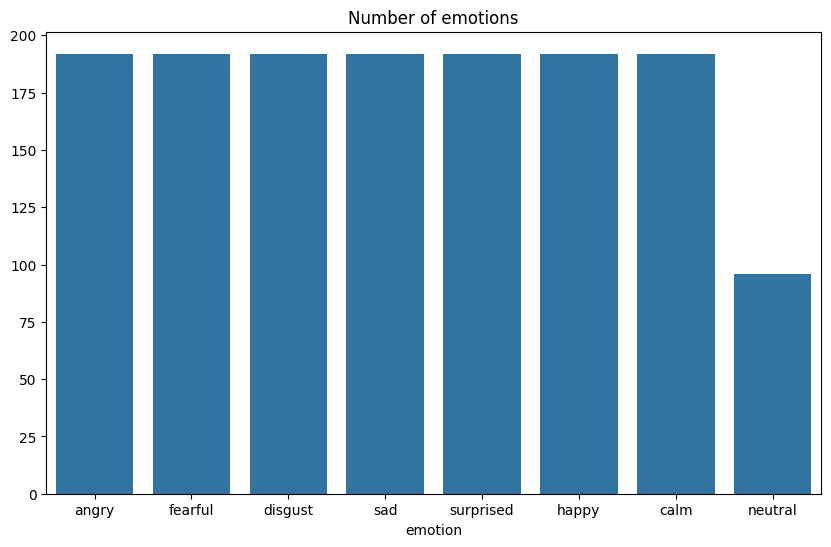

In [53]:
# let's do a little bit of data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# count the number of emotions
emotion_count = ravdess_df['emotion'].value_counts()
print(emotion_count)

# plot the number of emotions
plt.figure(figsize=(10, 6))
emotion_labels = emotion_count.index.map(lambda x: filename_identifiers['emotion'][x])
sns.barplot(x=emotion_labels, y=emotion_count.values)
plt.title('Number of emotions')
plt.show()


ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_03/03-01-06-01-02-01-03.wav


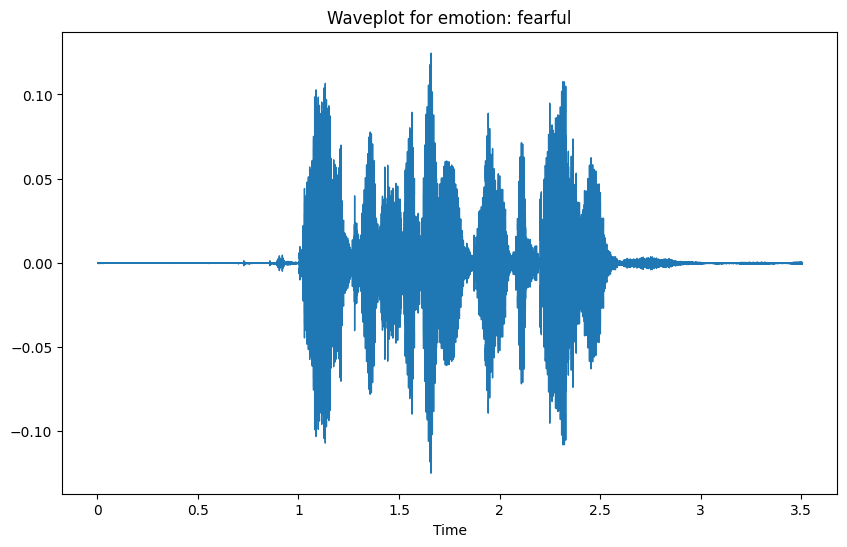

In [19]:
# lets look at waveplots for a recording, using librosa
import librosa
import librosa.display

def create_waveplot(data, s, emotion):
    plt.figure(figsize=(10, 6))
    plt.title('Waveplot for emotion: {}'.format(emotion))
    librosa.display.waveshow(data, sr=sr)
    plt.show()

random_recording = ravdess_df.sample()

file_path = random_recording['file_path'].values[0]
emotion = filename_identifiers['emotion'][random_recording['emotion'].values[0]] 
print(file_path)
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
display(Audio(file_path))

ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-03-02-01-02-08.wav


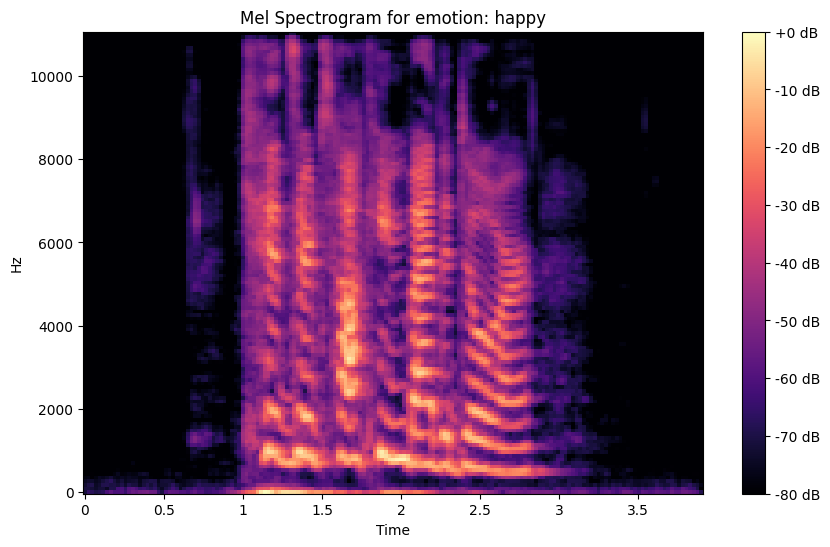

In [54]:
# now lets display some mel specs

import numpy as np 

def create_mel_spectrogram(data, sr, emotion):
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    plt.figure(figsize=(10, 6))
    plt.title('Mel Spectrogram for emotion: {}'.format(emotion))
    librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='hz', sr=sr, fmax=8000) # y_axis='mel' is also a good option to show mel frequency scale - double check this!
    plt.colorbar(format='%+2.0f dB')
    plt.show()

random_recording = ravdess_df.sample()

file_path = random_recording['file_path'].values[0]
emotion = filename_identifiers['emotion'][random_recording['emotion'].values[0]] 
print(file_path)
data, sr = librosa.load(file_path)
create_mel_spectrogram(data, sr, emotion)
display(Audio(file_path)) 

In [55]:
# playing with some data augmentation

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

Unprocessed audio


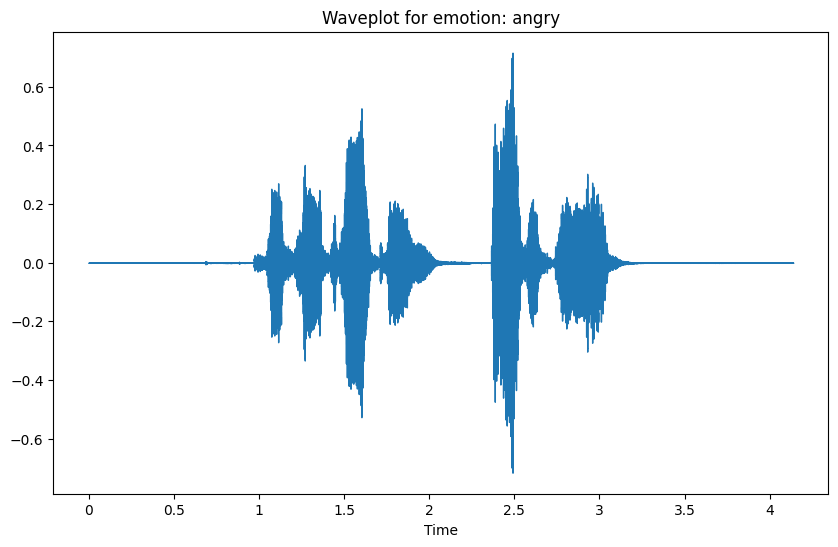

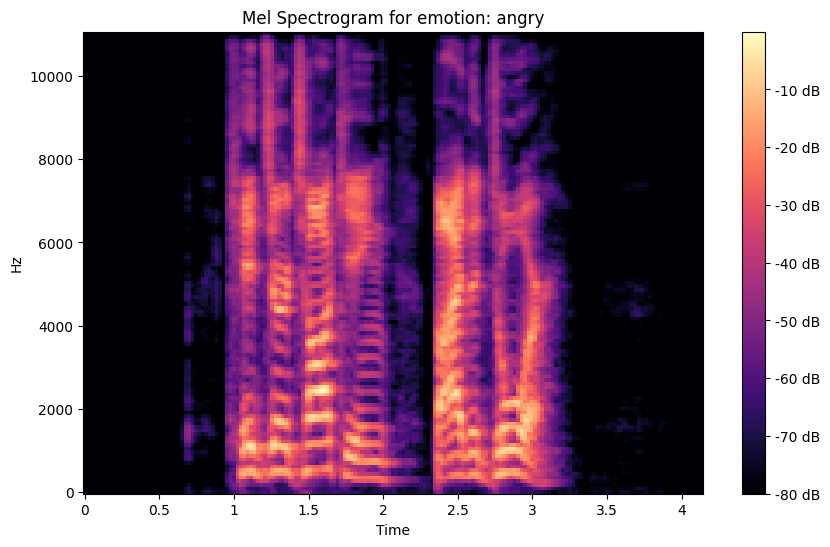

noise


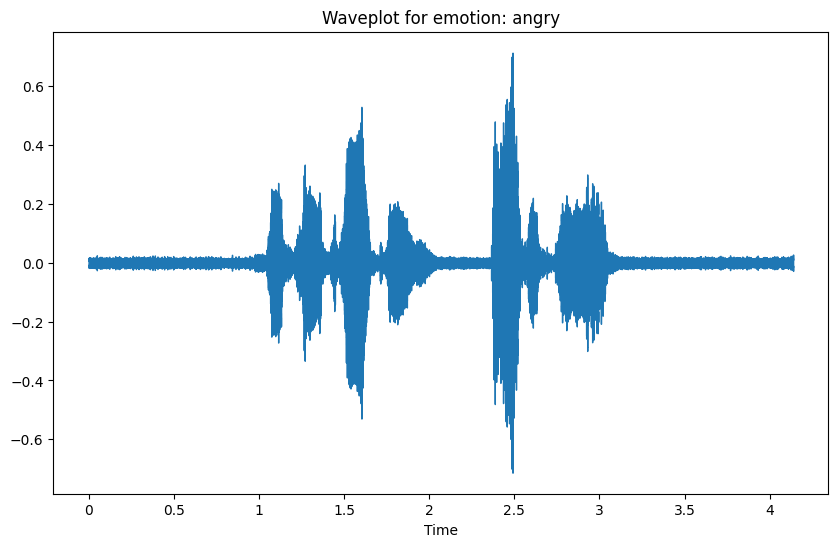

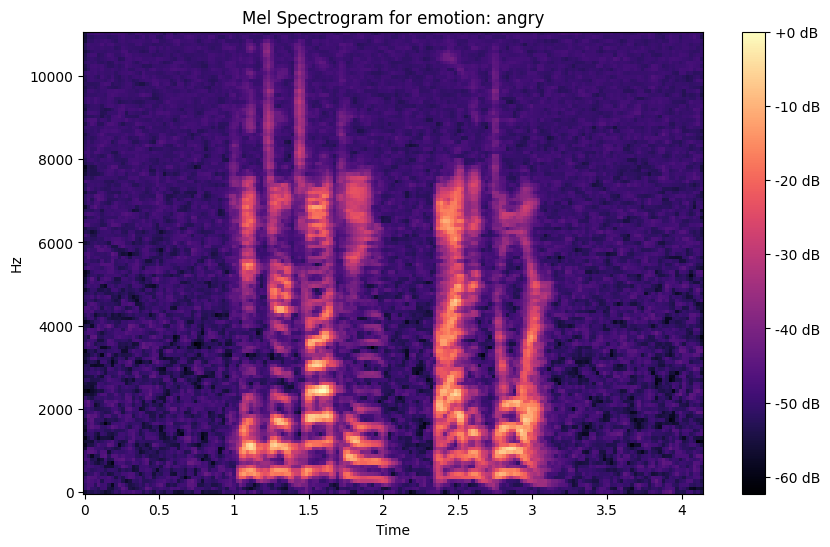

stretch


/var/folders/b1/c854wtzj2s12cmyl08yzghym0000gn/T/ipykernel_1717/3423435482.py:9: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


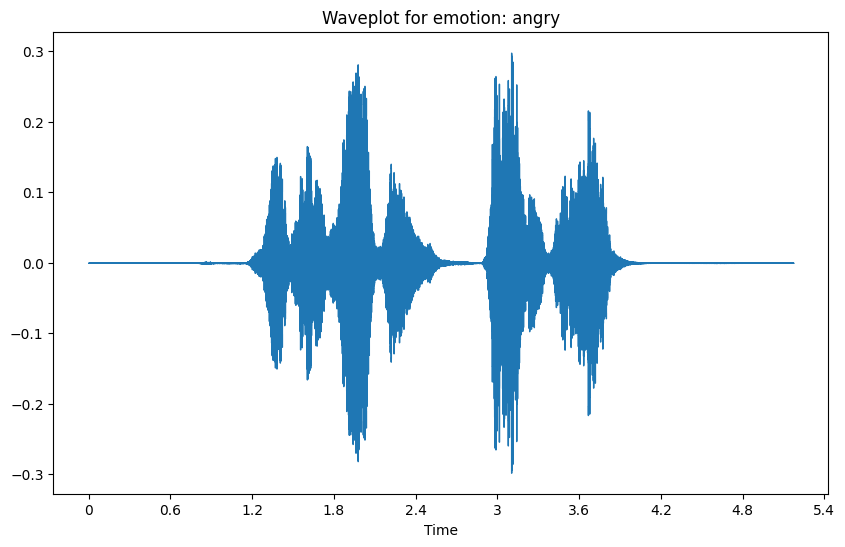

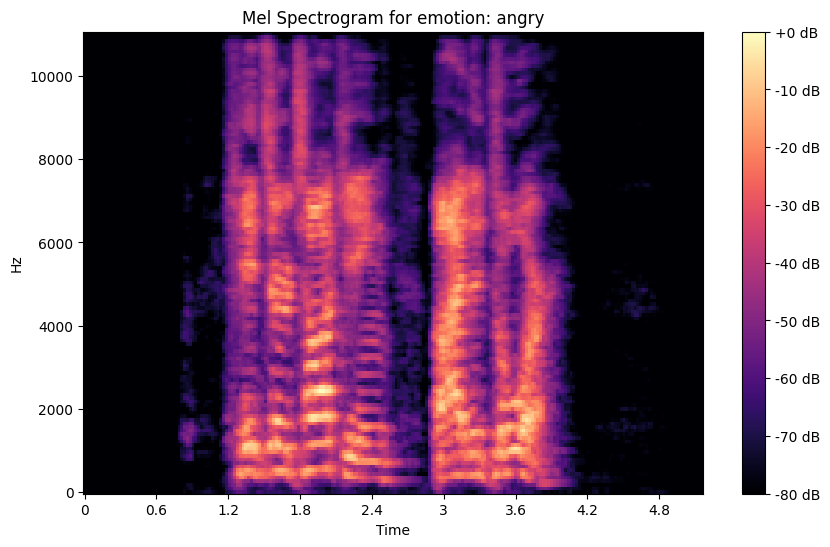

shift


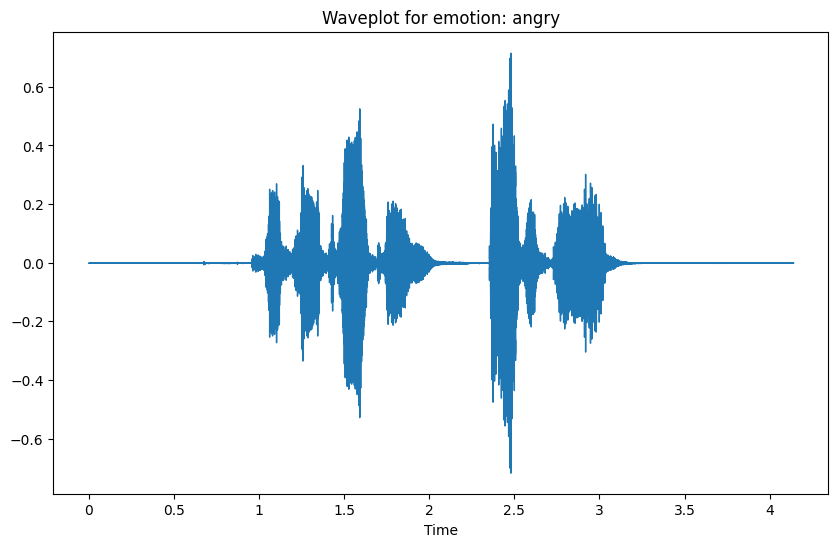

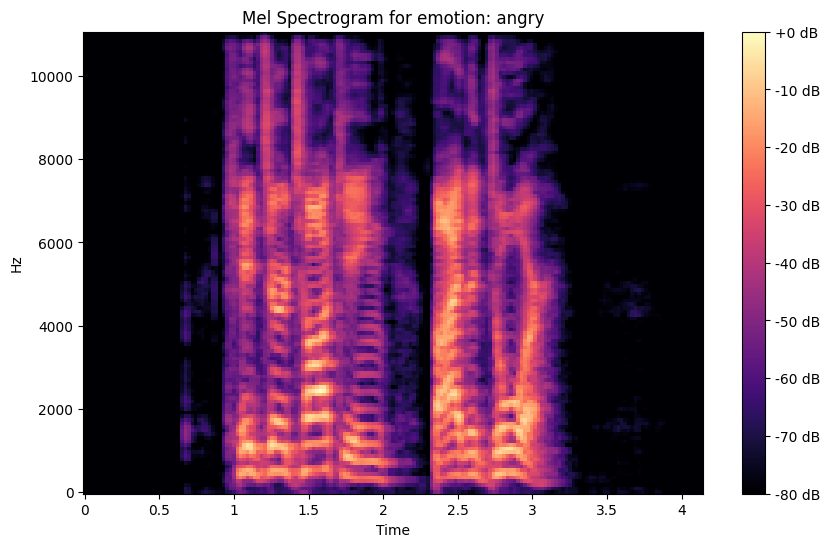

pitch


/var/folders/b1/c854wtzj2s12cmyl08yzghym0000gn/T/ipykernel_1717/3423435482.py:17: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


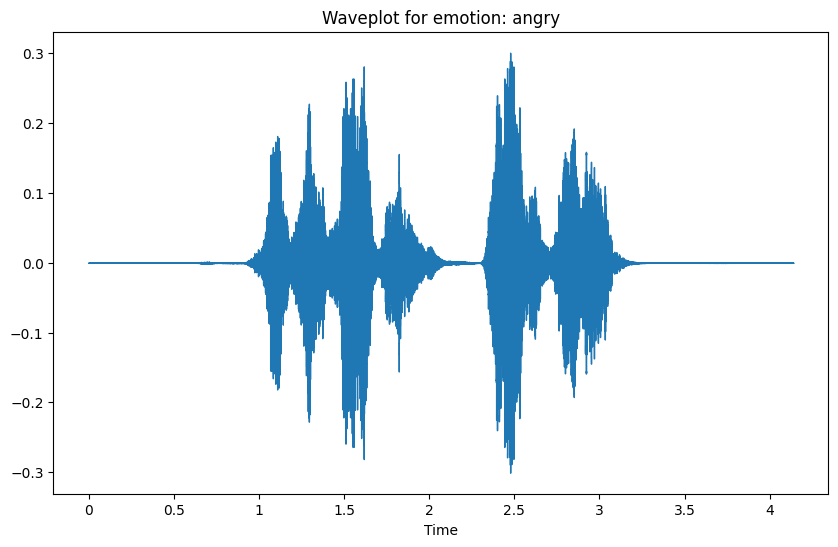

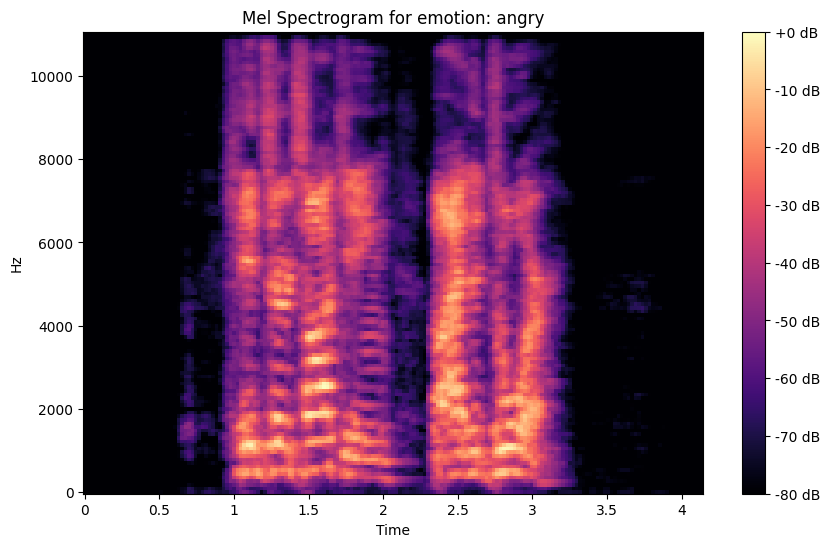

In [56]:
# testing out data augmentation on a ranndom recording

random_recording = ravdess_df.sample()
file_path = random_recording['file_path'].values[0]
emotion = filename_identifiers['emotion'][random_recording['emotion'].values[0]] 

# unprocessed audio
print('Unprocessed audio')
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_mel_spectrogram(data, sr, emotion)
display(Audio(file_path))

# noise
print('noise')
noise_data = noise(data)
create_waveplot(noise_data, sr, emotion)
create_mel_spectrogram(noise_data, sr, emotion)
display(Audio(noise_data, rate=sr))

# stretch
print('stretch')
stretch_data = stretch(data)
create_waveplot(stretch_data, sr, emotion)
create_mel_spectrogram(stretch_data, sr, emotion)
display(Audio(stretch_data, rate=sr))

# shift
print('shift')
shift_data = shift(data)
create_waveplot(shift_data, sr, emotion)
create_mel_spectrogram(shift_data, sr, emotion)
display(Audio(shift_data, rate=sr)) 

# pitch
print('pitch')
pitch_data = pitch(data, sr)
create_waveplot(pitch_data, sr, emotion)
create_mel_spectrogram(pitch_data, sr, emotion)
display(Audio(pitch_data, rate=sr))

In [57]:
# feature extraction
# https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225

"""
- Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
- Energy : The sum of squares of the signal values, normalized by the respective frame length.
- Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
- Spectral Centroid : The center of gravity of the spectrum.
- Spectral Spread : The second central moment of the spectrum.
- Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
- Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
- Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
- MFCCs: Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
- Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
- Chroma Deviation : The standard deviation of the 12 chroma coefficients.

For now, we will use the following features:
- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS(root mean square) value
- MelSpectogram to train our model.
"""

def extract_features(data, sample_rate):
    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(data).mean()
    
    # Chroma_stft
    chroma_stft = librosa.feature.chroma_stft(y=data, sr=sample_rate).mean()
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate).mean()
    
    # RMS
    rms = librosa.feature.rms(y=data).mean()
    
    # MelSpectogram
    mel_spectogram = librosa.feature.melspectrogram(y=data, sr=sample_rate).mean()
    
    # return the features as a dictionary
    return {
        'zcr': zcr, 
        'chroma_stft': chroma_stft, 
        'mfcc': mfcc, 
        'rms': rms, 
        'mel_spectogram': mel_spectogram
    }

def apply_features(row):
    data, sr = librosa.load(row['file_path'])
    features = extract_features(data, sr)
    for key, value in features.items():
        row[key] = value
    return row




In [58]:
random_recording = ravdess_df.sample()
file_path = random_recording['file_path'].values[0] 
data, sr = librosa.load(file_path)
features = extract_features(data, sr)
print(features)


{'zcr': 0.25665283203125, 'chroma_stft': 0.4045026, 'mfcc': -29.505056, 'rms': 0.011631475, 'mel_spectogram': 0.07599329}


In [76]:
# apply the features to the dataframe
ravdess_df = ravdess_df.apply(apply_features, axis=1)

In [78]:
ravdess_df

file_path modality  \
0     ravdess-emotional-speech-audio/audio_speech_ac...       03   
1     ravdess-emotional-speech-audio/audio_speech_ac...       03   
2     ravdess-emotional-speech-audio/audio_speech_ac...       03   
3     ravdess-emotional-speech-audio/audio_speech_ac...       03   
4     ravdess-emotional-speech-audio/audio_speech_ac...       03   
...                                                 ...      ...   
1435  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1436  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1437  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1438  ravdess-emotional-speech-audio/audio_speech_ac...       03   
1439  ravdess-emotional-speech-audio/audio_speech_ac...       03   

     vocal_channel emotion emotional_intensity statement repetition actor  \
0               01      05                  01        02         01    16   
1               01      06                  01        02         02    16   
2               01      06                  02        01         02    16   
3               01      05                  02        01         01    16   
4               01      07                  01        01         01    16   
...            ...     ...                 ...       ...        ...   ...   
1435            01      03                  02        02         02    08   
1436            01      03                  01        01         02    08   
1437            01      02                  02        01         01    08   
1438            01      02                  01        02         01    08   
1439            01      01                  01        02         02    08   

      gender       zcr  chroma_stft       mfcc       rms  mel_spectogram  
0          2  0.255368     0.380058 -30.427694  0.011947        0.076620  
1          2  0.212425     0.321757 -30.786812  0.008894        0.050620  
2          2  0.254243     0.390618 -21.437336  0.040955        1.254773  
3          2  0.226452     0.366829 -24.744236  0.025149        0.429319  
4          2  0.211632     0.350605 -31.821932  0.004312        0.010895  
...      ...       ...          ...        ...       ...             ...  
1435       2  0.164534     0.432904 -28.229185  0.009111        0.048682  
1436       2  0.147212     0.494403 -28.783037  0.003754        0.008408  
1437       2  0.160844     0.505921 -29.658031  0.001432        0.001137  
1438       2  0.162998     0.528469 -28.984114  0.002004        0.002257  
1439       2  0.156858     0.516500 -28.461498  0.002817        0.004656  

[1440 rows x 14 columns]

In [106]:
# try to do some classification...?

# drop the file_path column
ravdess_df_classification = ravdess_df.copy()
if 'file_path' in ravdess_df_classification.columns.tolist():
    ravdess_df_classification.drop(columns=[
        'file_path', 
        'modality', 
        'vocal_channel', 
        'emotional_intensity',
        'statement',
        'repetition',
        'actor',
        'gender',
        ], inplace=True)
ravdess_df_classification



emotion       zcr  chroma_stft       mfcc       rms  mel_spectogram
0         05  0.255368     0.380058 -30.427694  0.011947        0.076620
1         06  0.212425     0.321757 -30.786812  0.008894        0.050620
2         06  0.254243     0.390618 -21.437336  0.040955        1.254773
3         05  0.226452     0.366829 -24.744236  0.025149        0.429319
4         07  0.211632     0.350605 -31.821932  0.004312        0.010895
...      ...       ...          ...        ...       ...             ...
1435      03  0.164534     0.432904 -28.229185  0.009111        0.048682
1436      03  0.147212     0.494403 -28.783037  0.003754        0.008408
1437      02  0.160844     0.505921 -29.658031  0.001432        0.001137
1438      02  0.162998     0.528469 -28.984114  0.002004        0.002257
1439      01  0.156858     0.516500 -28.461498  0.002817        0.004656

[1440 rows x 6 columns]

In [110]:
"""

to try:
 - data augmentation
 - more feature extraction

"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# encode the emotion column
label_encoder = LabelEncoder()

ravdess_df_classification['emotion'] = label_encoder.fit_transform(ravdess_df_classification['emotion'])

# split the data into features and target
y = ravdess_df_classification['emotion']
X = ravdess_df_classification.drop(columns=['emotion'])

# normalize the data - try both standard and minmax scaling
cols = X.columns

#standard_scalar = StandardScaler()
#np_scaled = standard_scalar.fit_transform(X)
#X = pd.DataFrame(np_scaled, columns=cols)

minmax_scalar = MinMaxScaler()
np_scaled = minmax_scalar.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create predefined funciton to assess accuracy of mode
def model_access(model, title = "Default"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy', title, ":", round(accuracy_score(y_test, y_pred), 5), '\n')

# create a random forest model
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
model_access(model, "Random Forest")

# create a cross gradient booster
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
model_access(model, "XGBoost")


# make predictions
#y_pred = model.predict(X_test)

# evaluate the model
#print('Classification Report')
#print(classification_report(y_test, y_pred))

#print('Confusion Matrix')
#print(confusion_matrix(y_test, y_pred))

#print('Accuracy Score')
#print(accuracy_score(y_test, y_pred))

Accuracy Random Forest : 0.34375 

Accuracy XGBoost : 0.33681 



In [99]:
# lets try to use a neural network with pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# convert the data to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

# create a dataloader
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# create a neural network

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 8)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = NeuralNetwork()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# train the model

epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch: %d, Loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))

Epoch: 1, Loss: 1.900
Epoch: 2, Loss: 1.747
Epoch: 3, Loss: 1.734
Epoch: 4, Loss: 1.679
Epoch: 5, Loss: 1.651
Epoch: 6, Loss: 1.632
Epoch: 7, Loss: 1.624
Epoch: 8, Loss: 1.600
Epoch: 9, Loss: 1.552
Epoch: 10, Loss: 1.541
Epoch: 11, Loss: 1.537
Epoch: 12, Loss: 1.488
Epoch: 13, Loss: 1.462
Epoch: 14, Loss: 1.431
Epoch: 15, Loss: 1.421
Epoch: 16, Loss: 1.384
Epoch: 17, Loss: 1.334
Epoch: 18, Loss: 1.346
Epoch: 19, Loss: 1.287
Epoch: 20, Loss: 1.288
Epoch: 21, Loss: 1.239
Epoch: 22, Loss: 1.229
Epoch: 23, Loss: 1.199
Epoch: 24, Loss: 1.162
Epoch: 25, Loss: 1.185
Epoch: 26, Loss: 1.162
Epoch: 27, Loss: 1.077
Epoch: 28, Loss: 1.046
Epoch: 29, Loss: 1.115
Epoch: 30, Loss: 1.046
Epoch: 31, Loss: 0.936
Epoch: 32, Loss: 0.911
Epoch: 33, Loss: 0.899
Epoch: 34, Loss: 0.887
Epoch: 35, Loss: 0.936
Epoch: 36, Loss: 0.871
Epoch: 37, Loss: 0.832
Epoch: 38, Loss: 0.844
Epoch: 39, Loss: 0.762
Epoch: 40, Loss: 0.778
Epoch: 41, Loss: 0.899
Epoch: 42, Loss: 0.842
Epoch: 43, Loss: 0.765
Epoch: 44, Loss: 0.7

# Let's grab more datasets and see if we can improve our metrics

## Surrey Audio-Visual Expressed Emotion (SAVEE)
[SAVEE](https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee)
`kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee`

## Toronto emotional speech set (TESS)
[TESS](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)
`kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess`

## Crowd Sourced Emotional Multimodal Actors Dataset (CREMA-D)
[CREMA-D](https://www.kaggle.com/datasets/ejlok1/cremad)
`kaggle datasets download -d ejlok1/cremad`


In [1]:
# unzip dataset

import zipfile

def unzip_file(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zf:
        zf.extractall(dest_dir)

unzip_file('datasets/surrey-audiovisual-expressed-emotion-savee.zip', 'datasets/surrey-audiovisual-expressed-emotion-savee')
unzip_file('datasets/toronto-emotional-speech-set-tess.zip', 'datasets/toronto-emotional-speech-set-tess')
unzip_file('datasets/cremad.zip', 'datasets/cremad')

In [11]:
# Let's create a new dataframe for all four of these datasets that combines them all into one dataframe

ravdess_dir = 'datasets/ravdess-emotional-speech-audio/'
crema_dir = 'datasets/cremad/'
tess_dir = 'datasets/toronto-emotional-speech-set-tess/'
savee_dir = 'datasets/surrey-audiovisual-expressed-emotion-savee/'

In [18]:
import os
import pandas as pd
# ravdess

"""
let's create a pandas dataframe with this data

Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. 
The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent.
Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions.
Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. 
The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). 
These identifiers define the stimulus characteristics:

Filename identifiers

    [0] - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

    [1] - Vocal channel (01 = speech, 02 = song).

    [2] - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

    [3] - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

    [4] - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

    [5] - Repetition (01 = 1st repetition, 02 = 2nd repetition).

    [6] - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

    Audio-only (03)
    Speech (01)
    Fearful (06)
    Normal intensity (01)
    Statement "dogs" (02)
    1st Repetition (01)
    12th Actor (12) - Female, as the actor ID number is even.
"""

"""
ravdess_directory_list = os.listdir(ravdess_dir)

ravdess_file_emotion = []
ravdess_file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir(ravdess_dir + dir)
    for file in actor:
        part = file.split('.')[0].split('-') # split to remove file name extension, then into file name identifiers
        print(part)
        ravdess_file_emotion.append(int(part[2]))
        ravdess_file_path.append(ravdess_dir + dir + '/' + file)

# create a dataframe for the emotion of files
emotion_df = pd.DataFrame(ravdess_file_emotion, columns=['emotions'])

# create a dataframe for the file paths
path_df = pd.DataFrame(ravdess_file_path, column=['file_path'])

# create ravdess dataframe with emotions and file paths
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# change integers to name of emotino
ravdess_df.emotions.replace(
    {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fear',
        7: 'disgust',
        8: 'surprise'
    }, inplace=True
)

# take a look at the top rows
ravdess_df.head()
"""

ravdess_emotion_lookup = {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fear',
        7: 'disgust',
        8: 'surprise'
}
files = []
for dirpath, dirnames, filenames in os.walk('datasets/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'):
    for file in filenames:
        file = file[:-4] # remove .wav extension
        split_filename = file.split('-')
        new_row = {
            'file_path': os.path.join(dirpath, file + '.wav'),
            'emotion': ravdess_emotion_lookup[int(split_filename[2])], 
            }
        files.append(new_row)
ravdess_df = pd.DataFrame(files, columns=['file_path','emotion'])
 
ravdess_df





file_path  emotion
0     datasets/ravdess-emotional-speech-audio/audio_...    angry
1     datasets/ravdess-emotional-speech-audio/audio_...     fear
2     datasets/ravdess-emotional-speech-audio/audio_...     fear
3     datasets/ravdess-emotional-speech-audio/audio_...    angry
4     datasets/ravdess-emotional-speech-audio/audio_...  disgust
...                                                 ...      ...
1435  datasets/ravdess-emotional-speech-audio/audio_...    happy
1436  datasets/ravdess-emotional-speech-audio/audio_...    happy
1437  datasets/ravdess-emotional-speech-audio/audio_...     calm
1438  datasets/ravdess-emotional-speech-audio/audio_...     calm
1439  datasets/ravdess-emotional-speech-audio/audio_...  neutral

[1440 rows x 2 columns]